In [2]:
import numpy as np
from astropy.io import fits
import lime
import matplotlib.pyplot as plt

SLIT 8

In [3]:
hdul8 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_1D_f99_c00.fits', mode='update')
header8 = hdul8[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header8['FLUXSCAL'] = 1
header8

hdul8.flush()

In [4]:
print(header8)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2382 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-04T18:29:02' / Date FITS file was generated                  IRAF-TLM= '2024-11-04T18:29:02' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4028.45336914063 / RA at R

In [5]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [6]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file8 = "../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_1D_f99_c00.fits"

#load the data
wave8, flux8, hdr8 = import_1313_fits(fits_file8)

In [7]:
# Galaxy redshift and the flux normalization
# la misma para todos los slits
z_obj = 0.001568
normFlux = 1

In [8]:
spec8 = lime.Spectrum(wave8, flux8, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

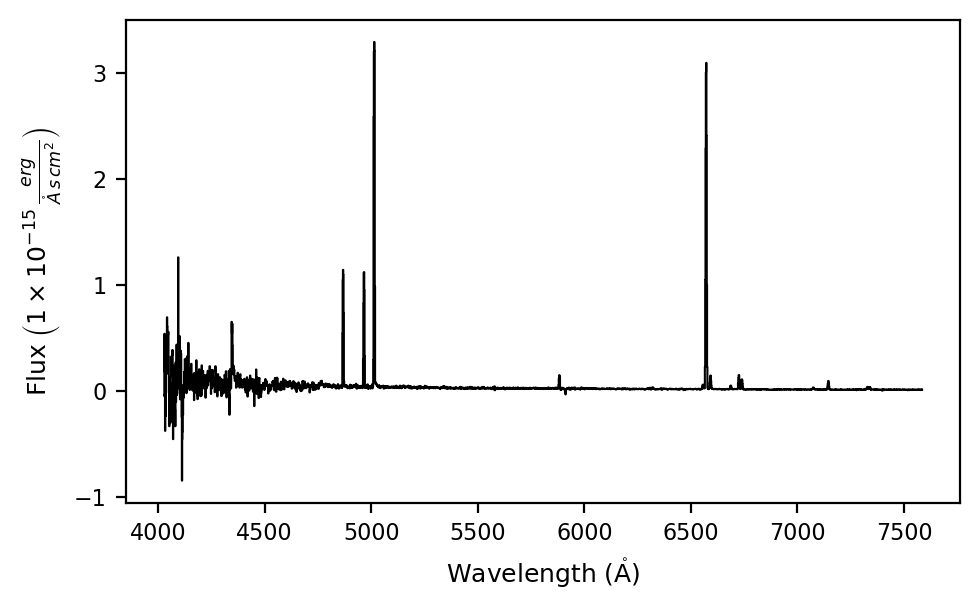

In [9]:
spec8.plot.spectrum(label='slit8_mask2_NGC1313')

In [10]:
# Line name, its location mask in the rest _frame and fit configuration
line8_Ha = 'H1_6563A_b'
band_edges8_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf8_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

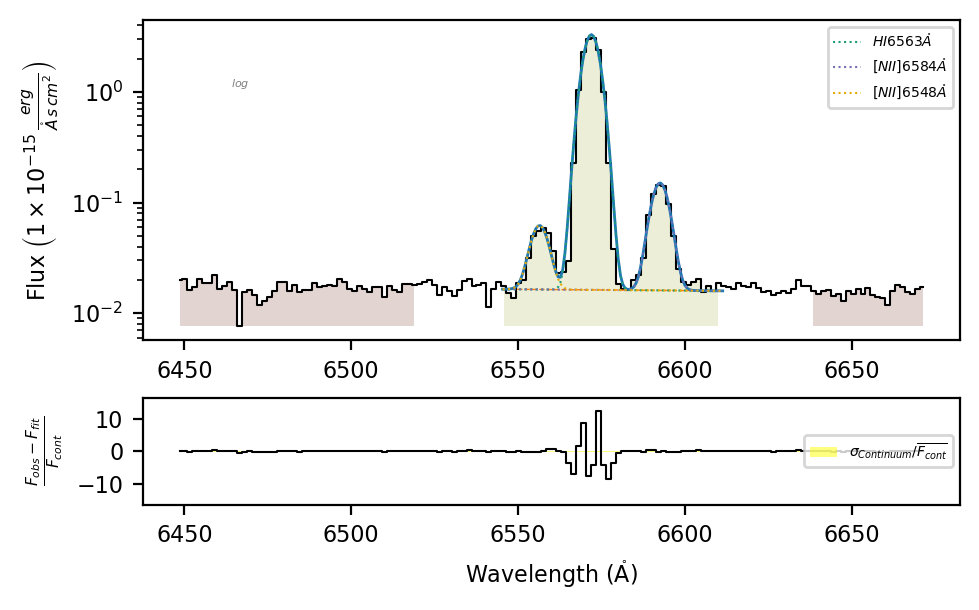

In [11]:
# New attempt including the fit configuration
spec8.fit.bands(line8_Ha, band_edges8_Ha, fit_conf=fit_conf8_Ha)
spec8.plot.bands()

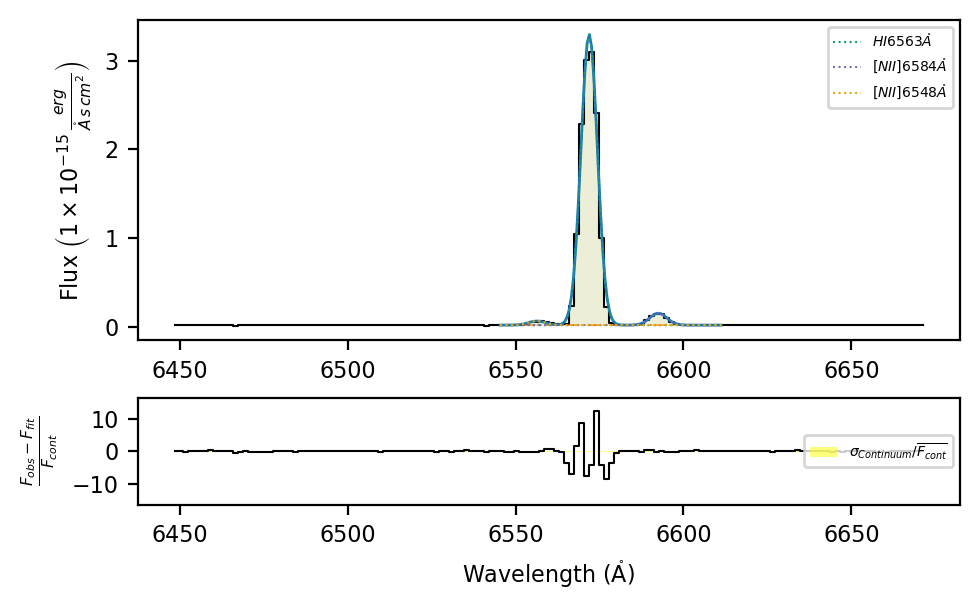

In [12]:
# New attempt including the fit configuration
spec8.fit.bands(line8_Ha, band_edges8_Ha, fit_conf=fit_conf8_Ha)
spec8.plot.bands(y_scale='linear')

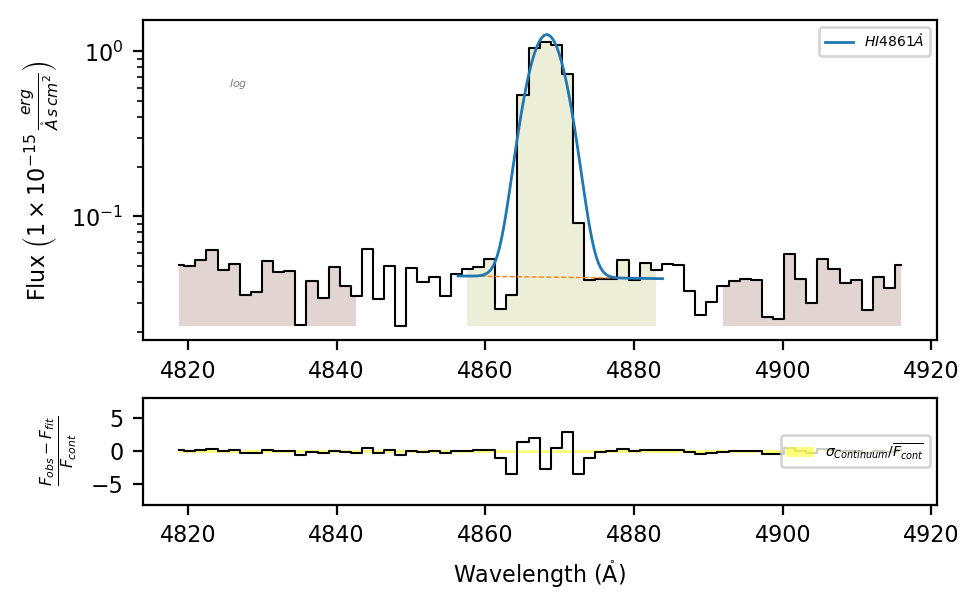

In [13]:
spec8.fit.bands('H1_4861A')
spec8.plot.bands()

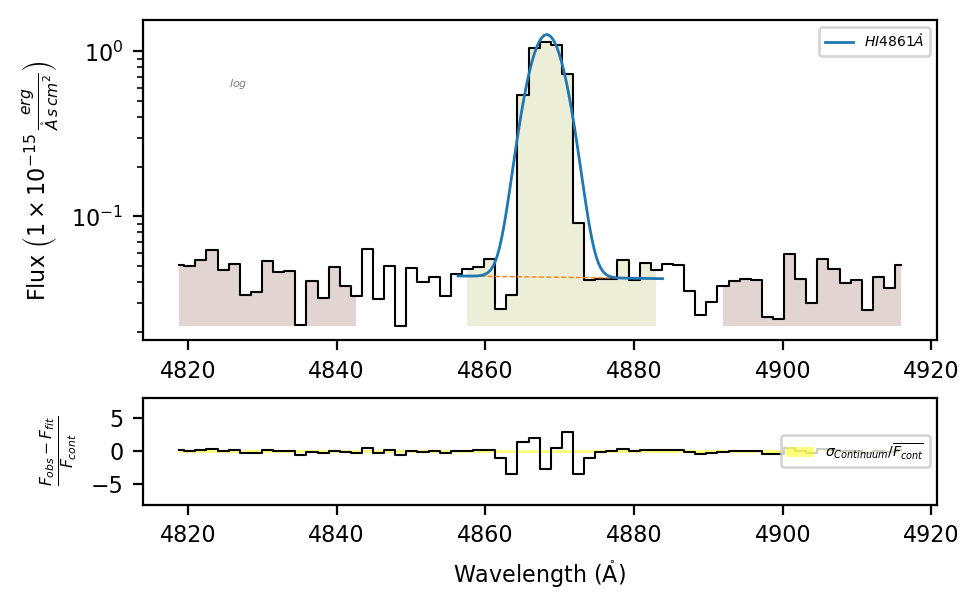

In [14]:
spec8.fit.bands(4861)
spec8.plot.bands()

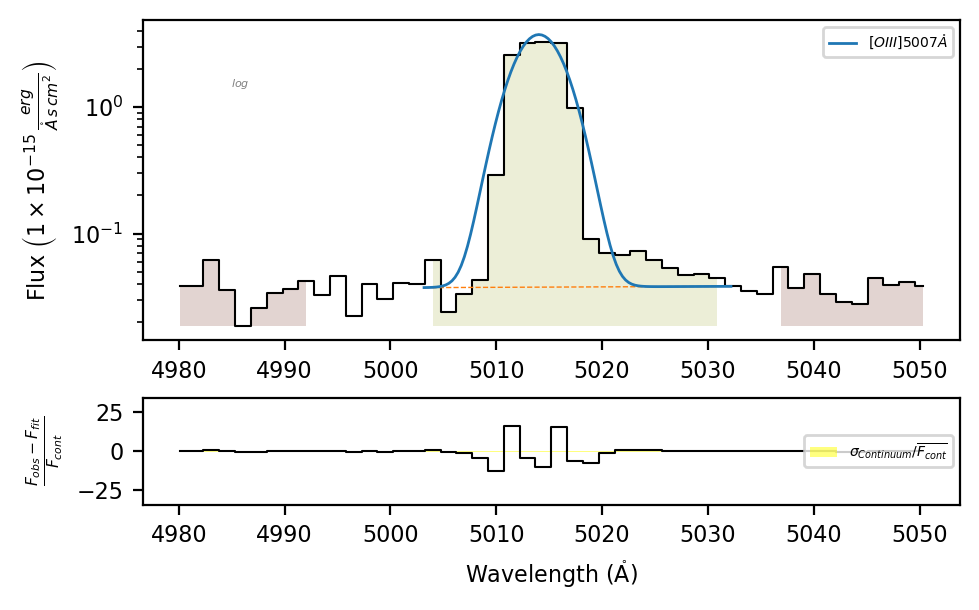

In [15]:
spec8.fit.bands('O3_5007A')
spec8.plot.bands()

In [16]:
#fit config for [OIII]
line8_O3 = 'O3_5007A_b'
fit_conf8_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.5'},
                'He1_5016A_amp':{'expr':'0.04'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

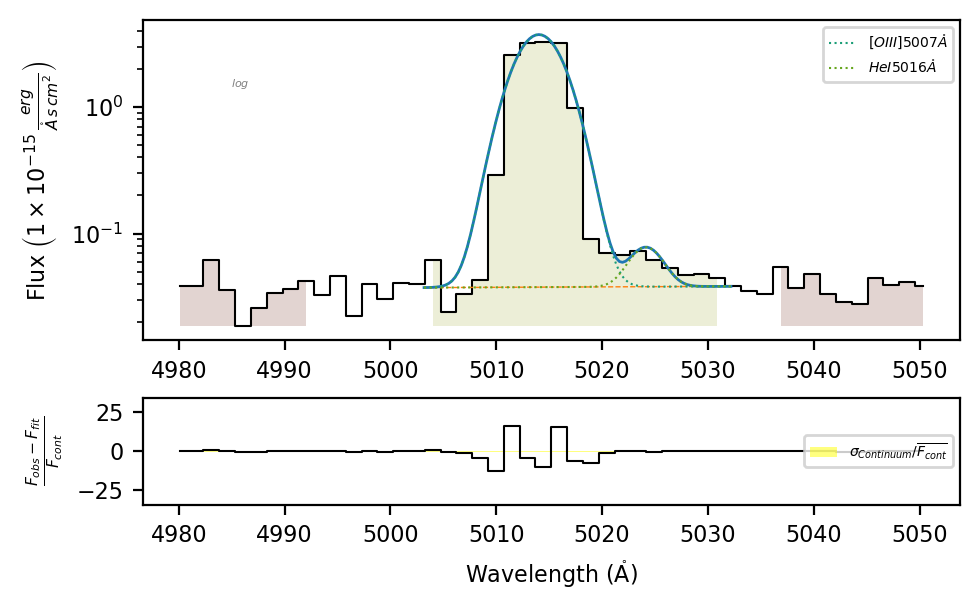

In [17]:
spec8.fit.bands(line8_O3, fit_conf=fit_conf8_O3)
spec8.plot.bands()

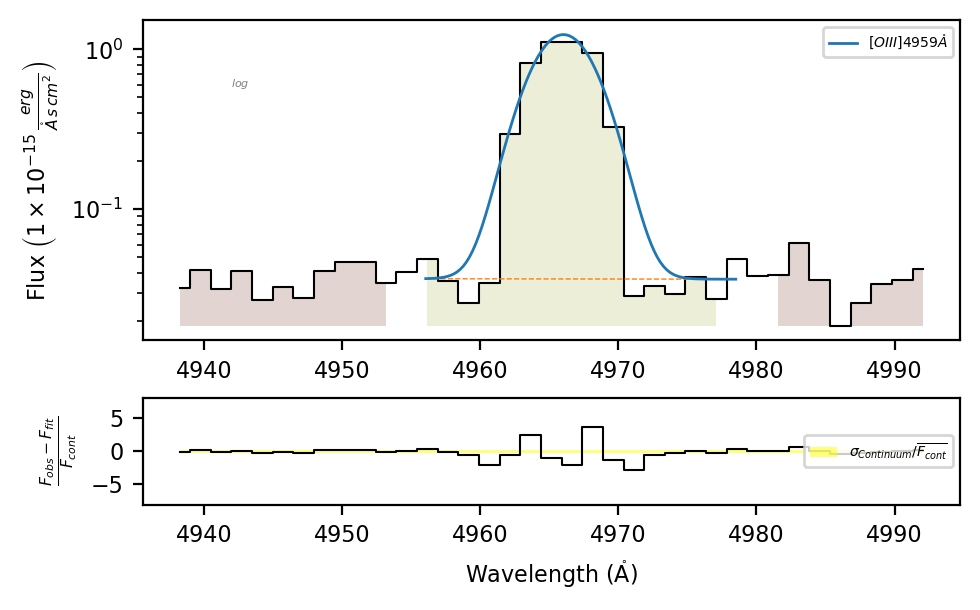

In [18]:
spec8.fit.bands(4959)
spec8.plot.bands()

In [19]:
# Line name, its location mask in the rest _frame and fit configuration
line8_S2 = 'S2_6716A_b'
band_edges8_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf8_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

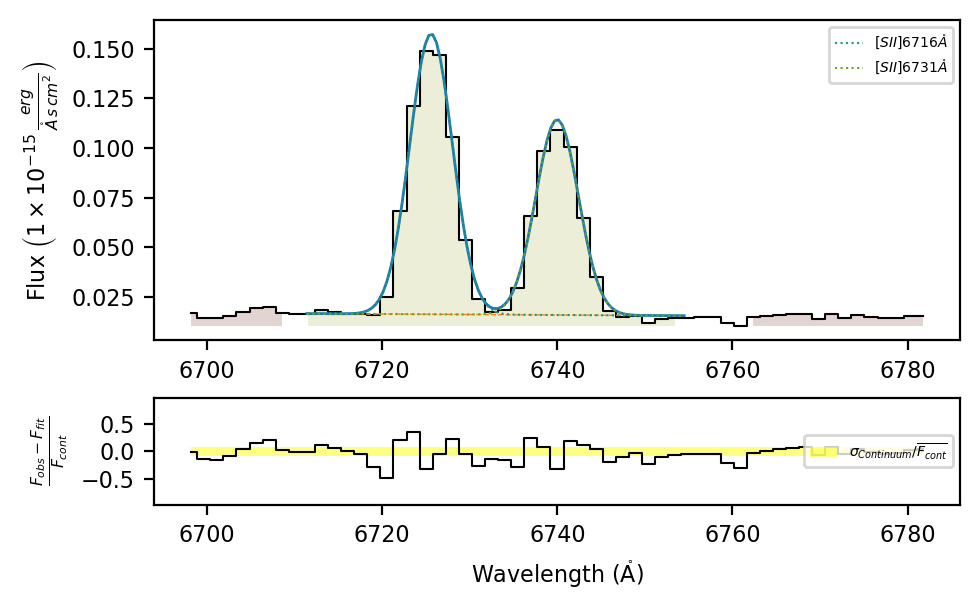

In [20]:
# New attempt including the fit configuration
spec8.fit.bands(line8_S2,band_edges8_S2, fit_conf=fit_conf8_S2)
spec8.plot.bands()

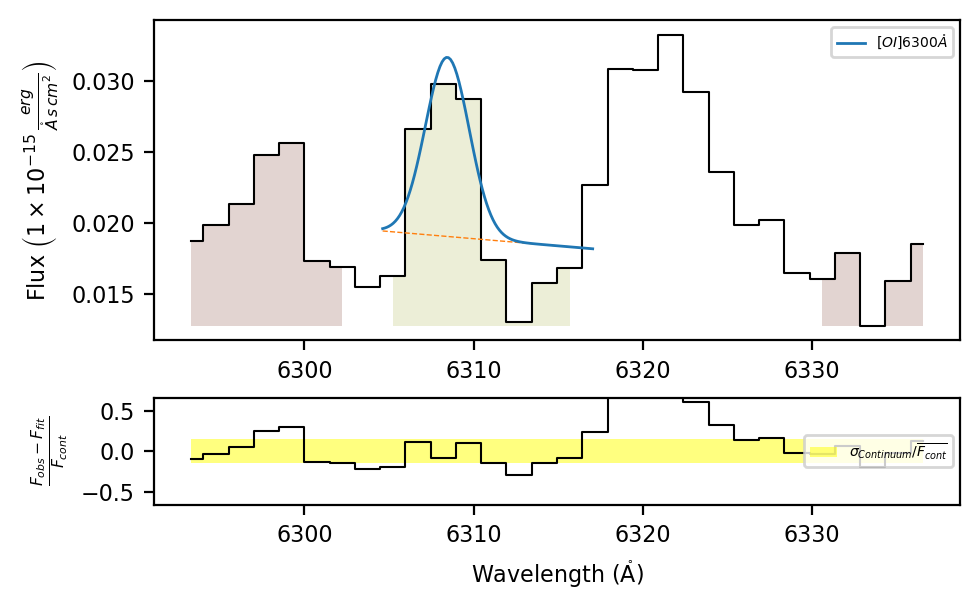

In [21]:
spec8.fit.bands(6300)
spec8.plot.bands()

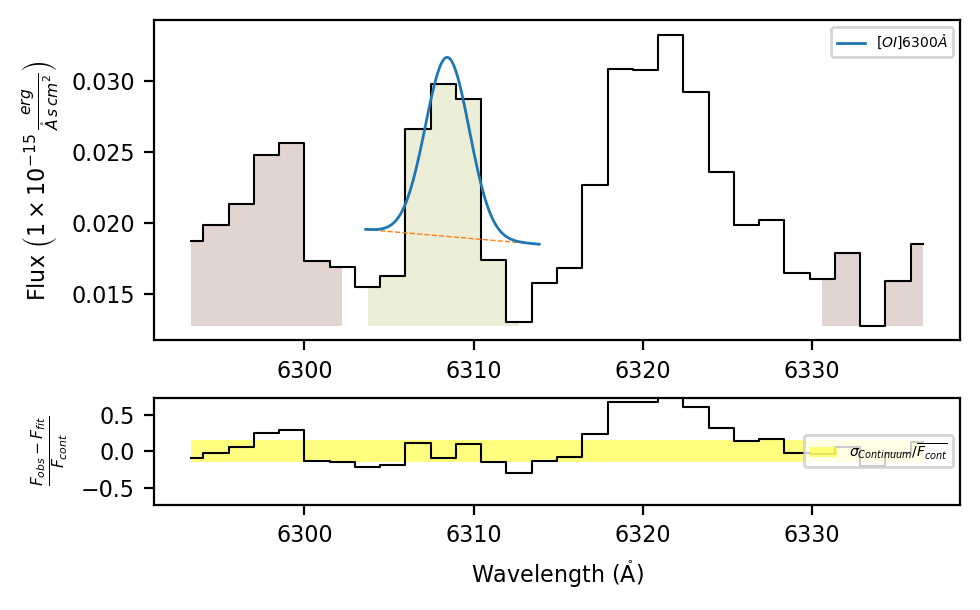

In [22]:
line8_OI = 'O1_6300A'
#band_edges_OI_8 = np.array([6282.963147, 6293.637954, 6294.754436, 6307.155360, 6319.711710, 6327.945925])
band_edges_OI_8 = np.array([6282.963147, 6293.637954, 6293.754436, 6304, 6319.711710, 6327.945925])
spec8.fit.bands(line8_OI, band_edges_OI_8)
spec8.plot.bands()

SLIT 14

In [23]:
hdul14 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_1D_f99_c00.fits', mode='update')
header14 = hdul14[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header14['FLUXSCAL'] = 1
header14

hdul14.flush()

In [24]:
print(header14)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2809 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-04T18:29:11' / Date FITS file was generated                  IRAF-TLM= '2024-11-04T18:29:11' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4036.02270507813 / RA at R

In [25]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file14 = "../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_1D_f99_c00.fits"

#load the data
wave14, flux14, hdr14 = import_1313_fits(fits_file14)

In [26]:
spec14 = lime.Spectrum(wave14, flux14, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

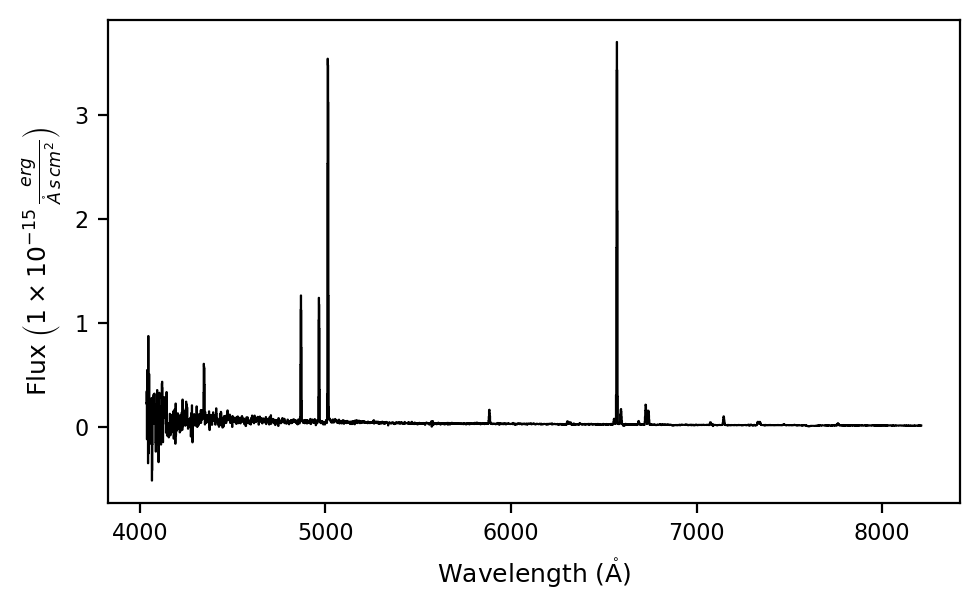

In [27]:
spec14.plot.spectrum(label='slit14_mask2_NGC1313')

In [28]:
# Line name, its location mask in the rest _frame and fit configuration
line14_Ha = 'H1_6563A_b'
band_edges14_Ha = np.array([6438.03, 6508.66, 6535.10, 6594, 6627.70, 6661.82])
fit_conf14_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

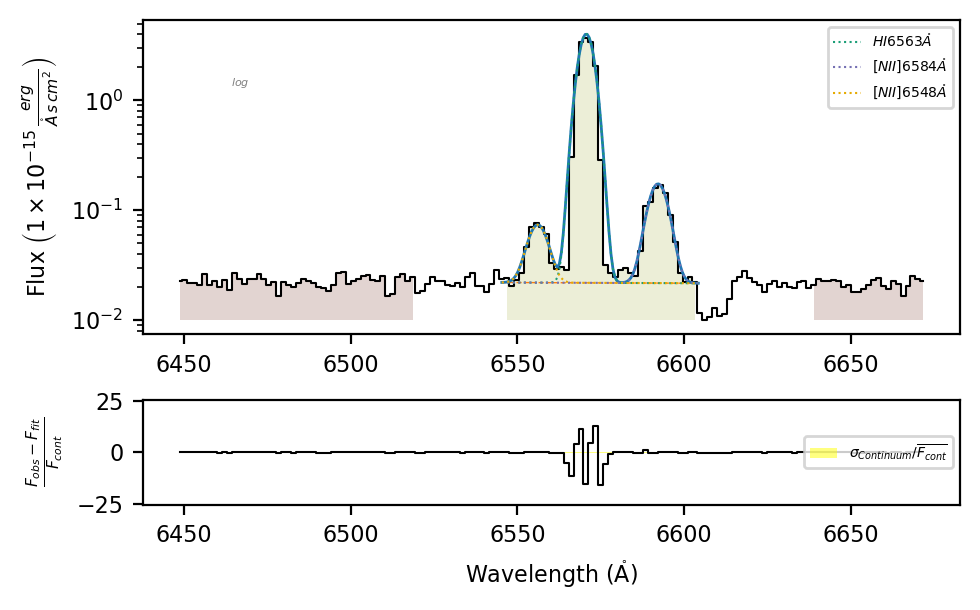

In [29]:
# New attempt including the fit configuration
spec14.fit.bands(line14_Ha, band_edges14_Ha, fit_conf=fit_conf14_Ha)
spec14.plot.bands()

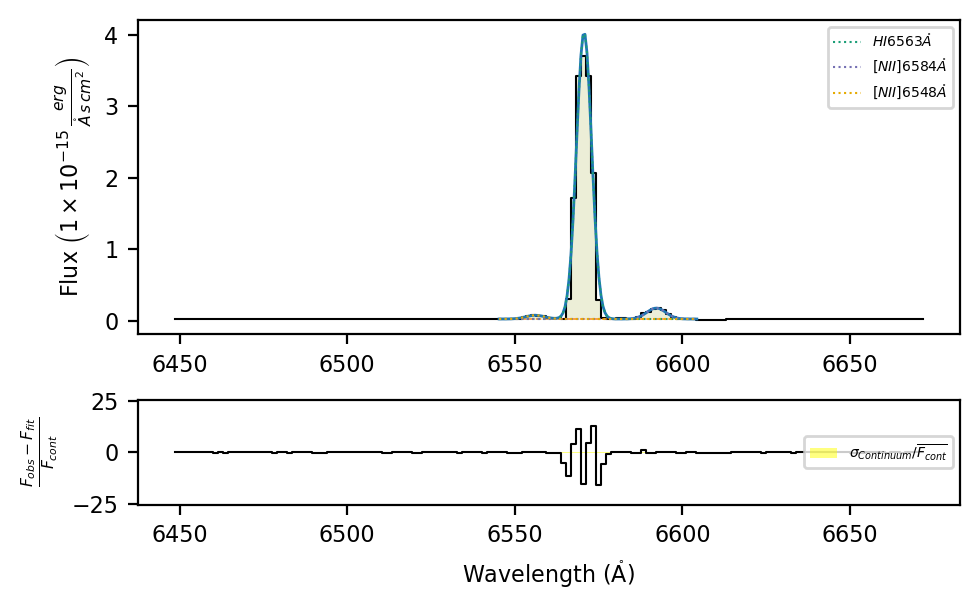

In [30]:
# New attempt including the fit configuration
spec14.fit.bands(line14_Ha, band_edges14_Ha, fit_conf=fit_conf14_Ha)
spec14.plot.bands(y_scale="linear")

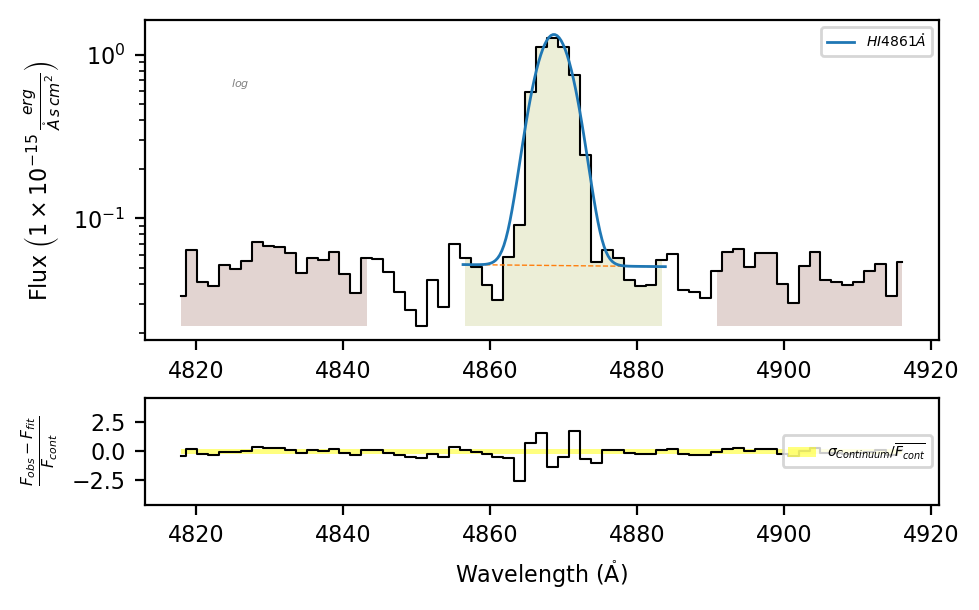

In [31]:
spec14.fit.bands(4861)
spec14.plot.bands()

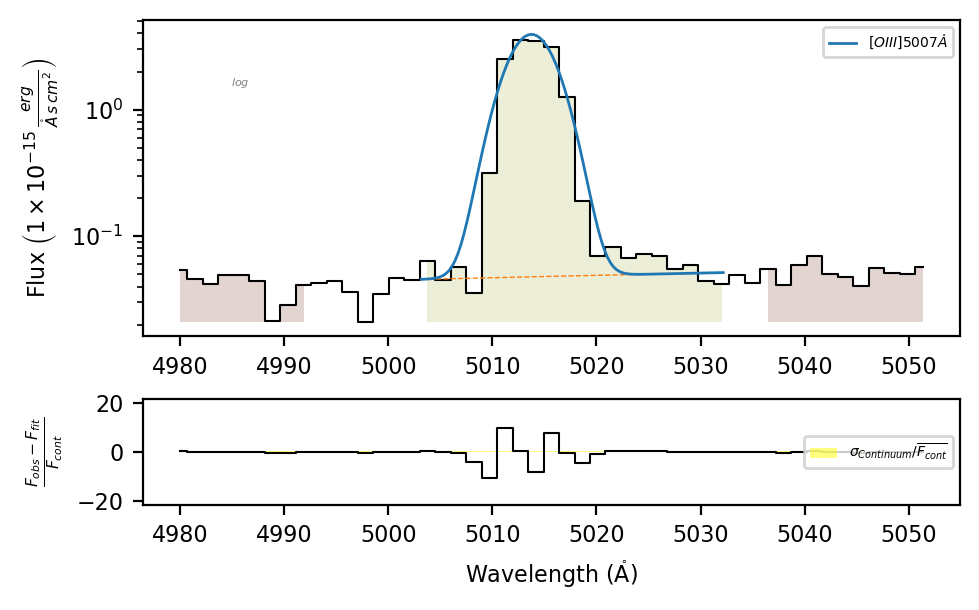

In [32]:
spec14.fit.bands('O3_5007A')
spec14.plot.bands()

In [33]:
#fit config for [OIII]
line14_O3 = 'O3_5007A_b'
fit_conf14_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.5'},
                'He1_5016A_amp':{'expr':'0.03'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

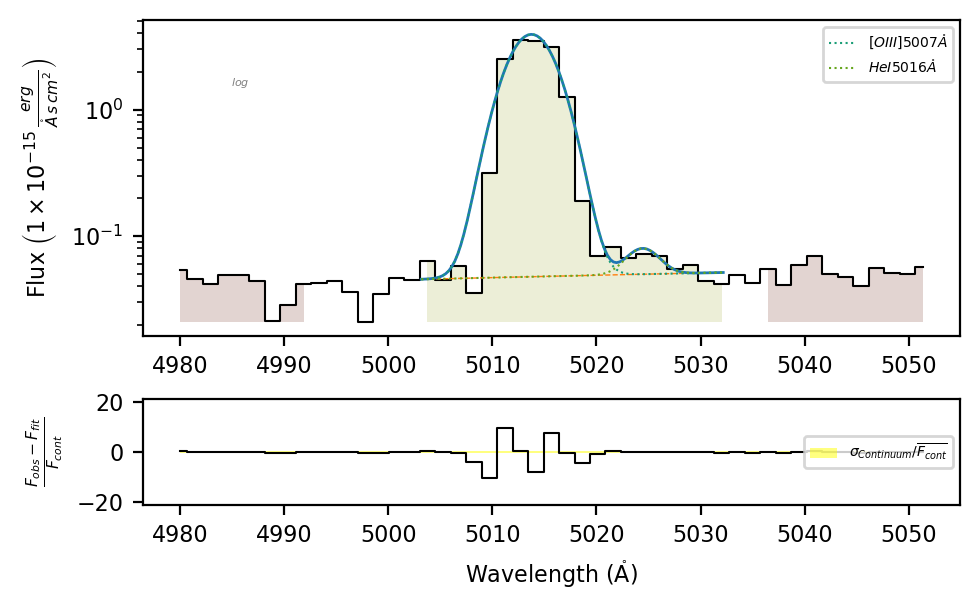

In [34]:
spec14.fit.bands(line14_O3, fit_conf=fit_conf14_O3)
spec14.plot.bands()

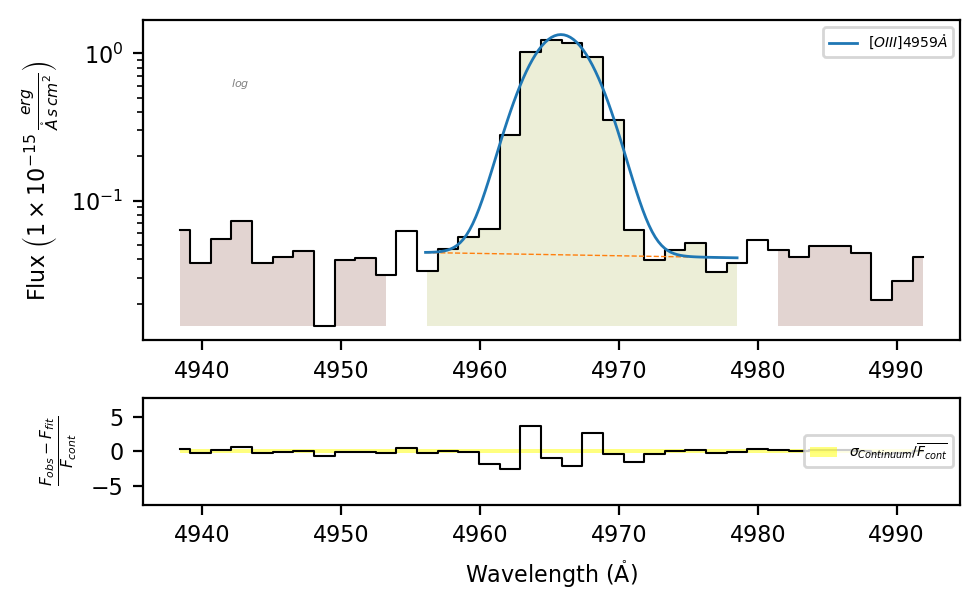

In [35]:
spec14.fit.bands(4959)
spec14.plot.bands()

In [36]:
# Line name, its location mask in the rest _frame and fit configuration
line14_S2 = 'S2_6716A_b'
band_edges14_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf14_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

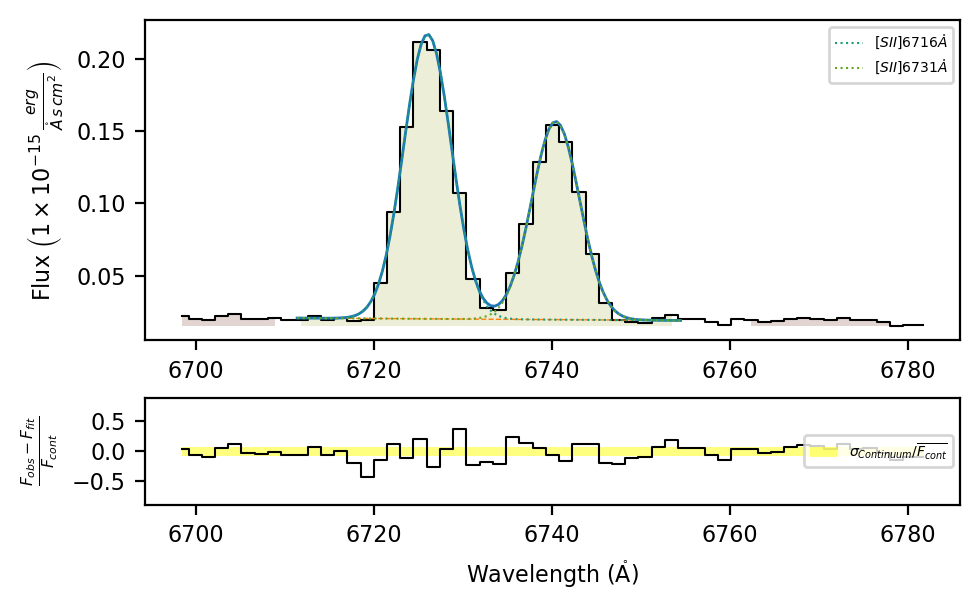

In [37]:
# New attempt including the fit configuration
spec14.fit.bands(line14_S2,band_edges14_S2, fit_conf=fit_conf14_S2)
spec14.plot.bands()

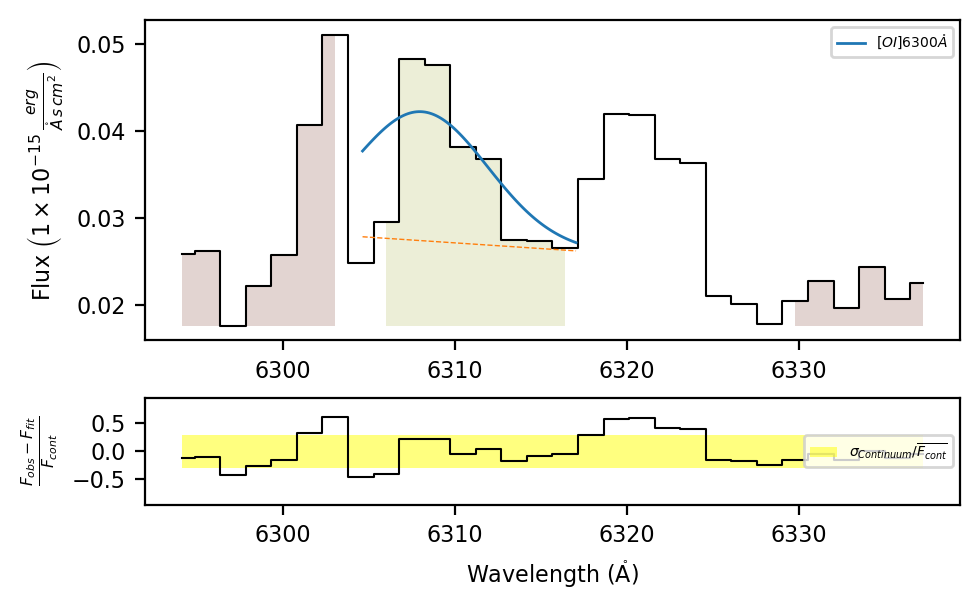

In [38]:
spec14.fit.bands(6300)
spec14.plot.bands()

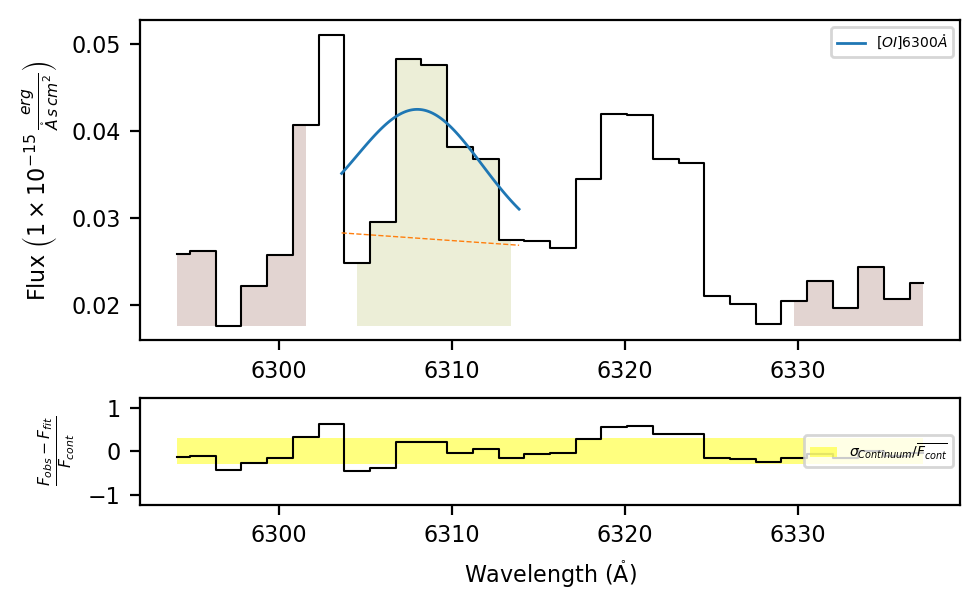

In [40]:
line14_OI = 'O1_6300A'
#band_edges_OI_14 = np.array([6282.963147, 6293.637954, 6294.754436, 6307.155360, 6319.711710, 6327.945925])
band_edges_OI_14 = np.array([6282.963147, 6293, 6293.754436, 6304, 6319.711710, 6327.945925])

spec14.fit.bands(line14_OI, band_edges_OI_14)
spec14.plot.bands()

SLIT 16

In [41]:
hdul16 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_1D_f99_c00.fits', mode='update')
header16 = hdul16[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header16['FLUXSCAL'] = 1
header16

hdul16.flush()

In [42]:
print(header16)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2696 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-04T18:29:21' / Date FITS file was generated                  IRAF-TLM= '2024-11-04T18:29:21' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4033.59643554687 / RA at R

In [43]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file16 = "../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_1D_f99_c00.fits"

#load the data
wave16, flux16, hdr16 = import_1313_fits(fits_file16)

In [44]:
spec16 = lime.Spectrum(wave16, flux16, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

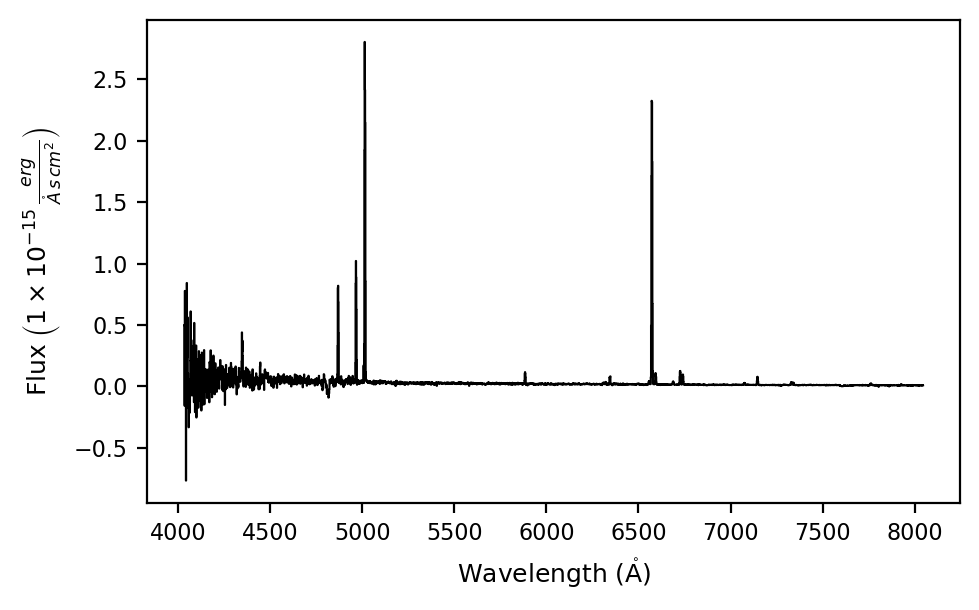

In [45]:
spec16.plot.spectrum(label='slit16_mask2_NGC1313')

In [46]:
# Line name, its location mask in the rest _frame and fit configuration
line16_Ha = 'H1_6563A_b'
band_edges16_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf16_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

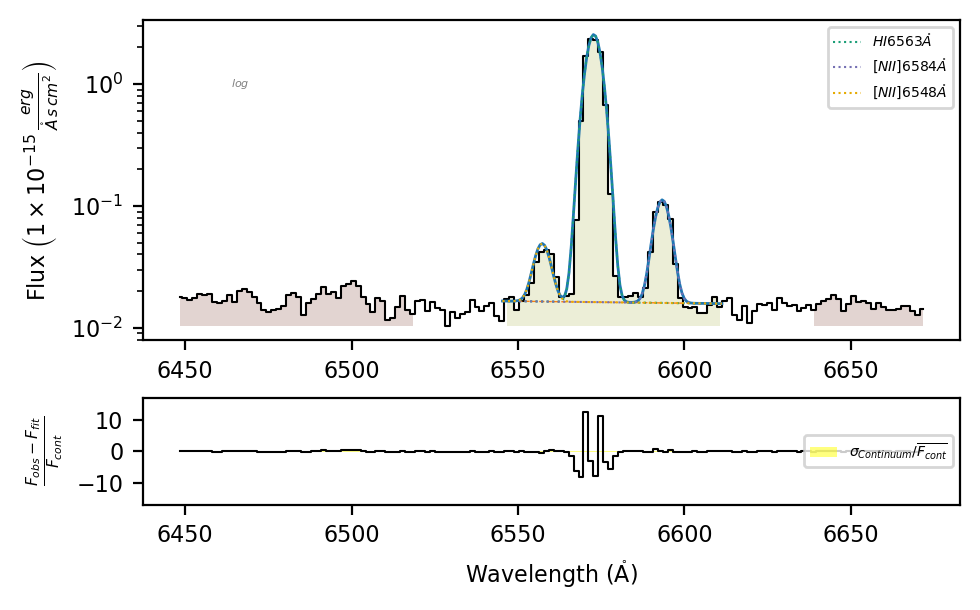

In [47]:
# New attempt including the fit configuration
spec16.fit.bands(line16_Ha, band_edges16_Ha, fit_conf=fit_conf16_Ha)
spec16.plot.bands()

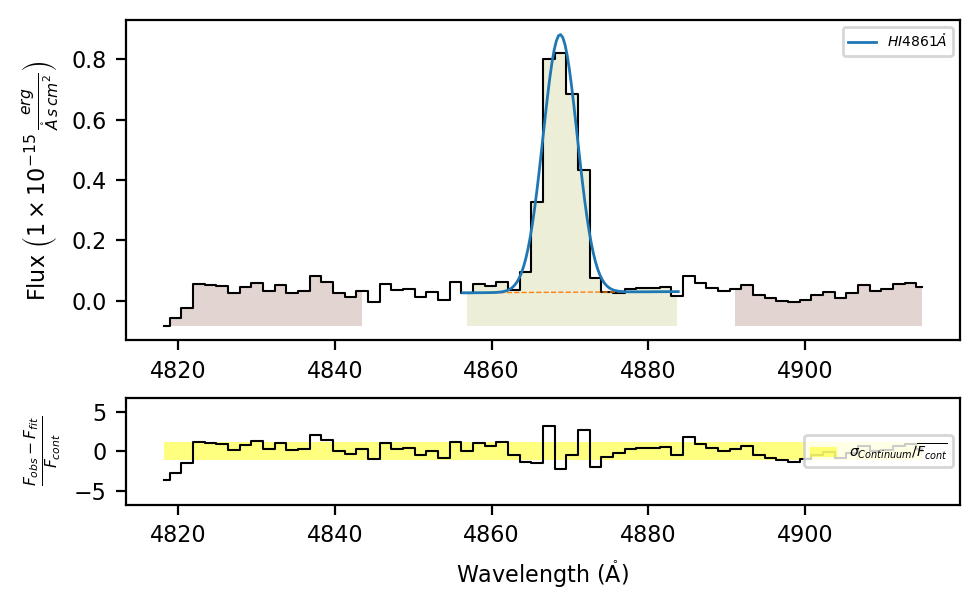

In [48]:
spec16.fit.bands('H1_4861A')
spec16.plot.bands()

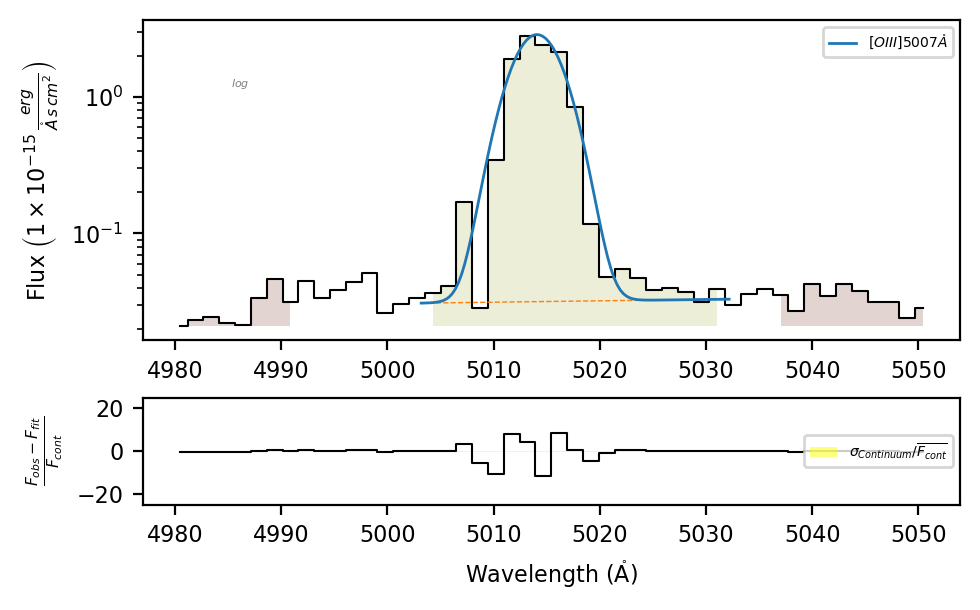

In [49]:
spec16.fit.bands('O3_5007A')
spec16.plot.bands()

In [68]:
#fit config for [OIII]
line16_O3 = 'O3_5007A_b'
band_edges16_O3 = np.array([4972.262233, 4985.876846, 5000, 5027, 5036.60, 5043.98])
fit_conf16_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.5'},
                'He1_5016A_amp':{'expr':'0.04'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

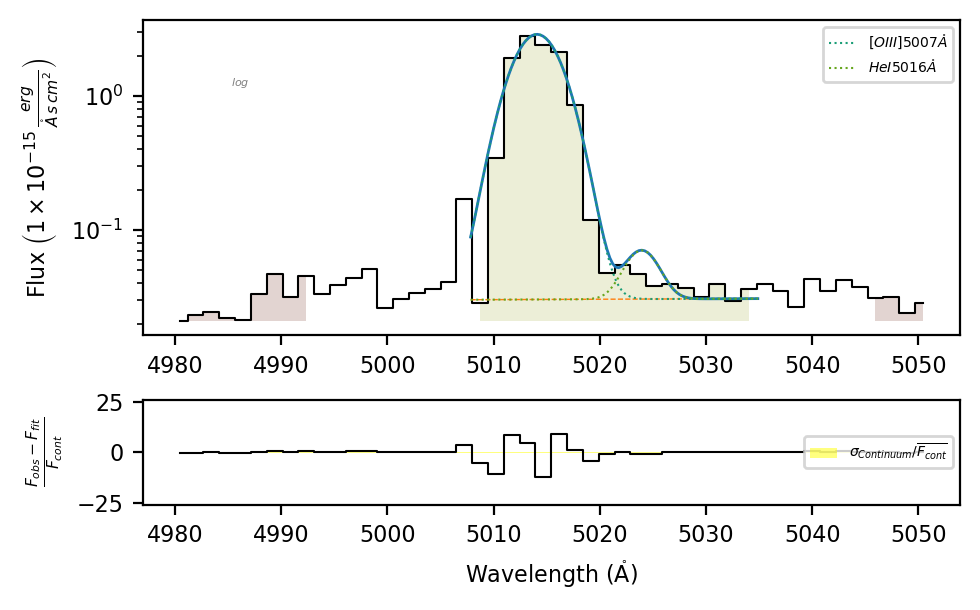

In [69]:
spec16.fit.bands(line16_O3, band_edges16_O3, fit_conf=fit_conf16_O3)
spec16.plot.bands()

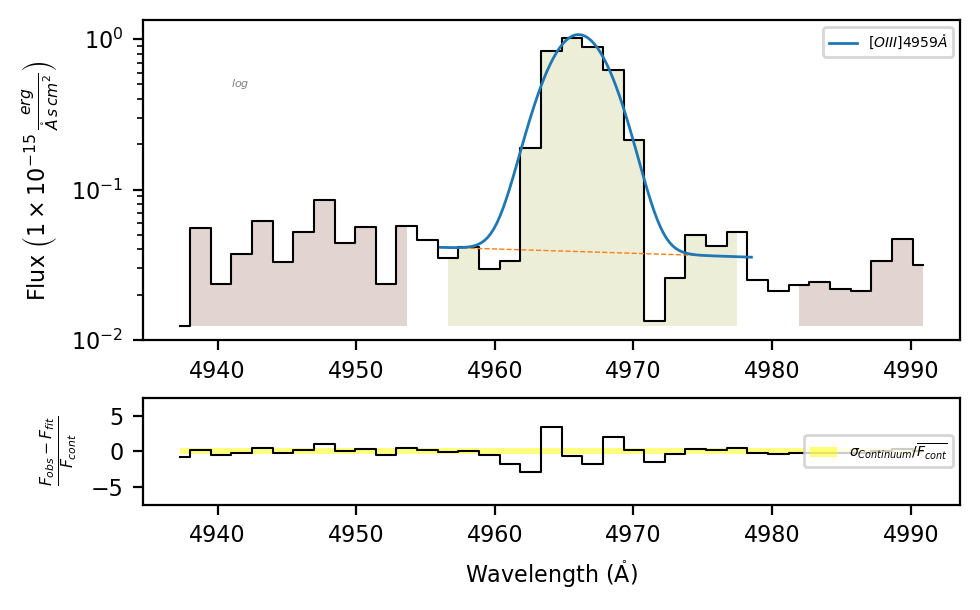

In [70]:
spec16.fit.bands(4959)
spec16.plot.bands()

In [71]:
# Line name, its location mask in the rest _frame and fit configuration
line16_S2 = 'S2_6716A_b'
band_edges16_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf16_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

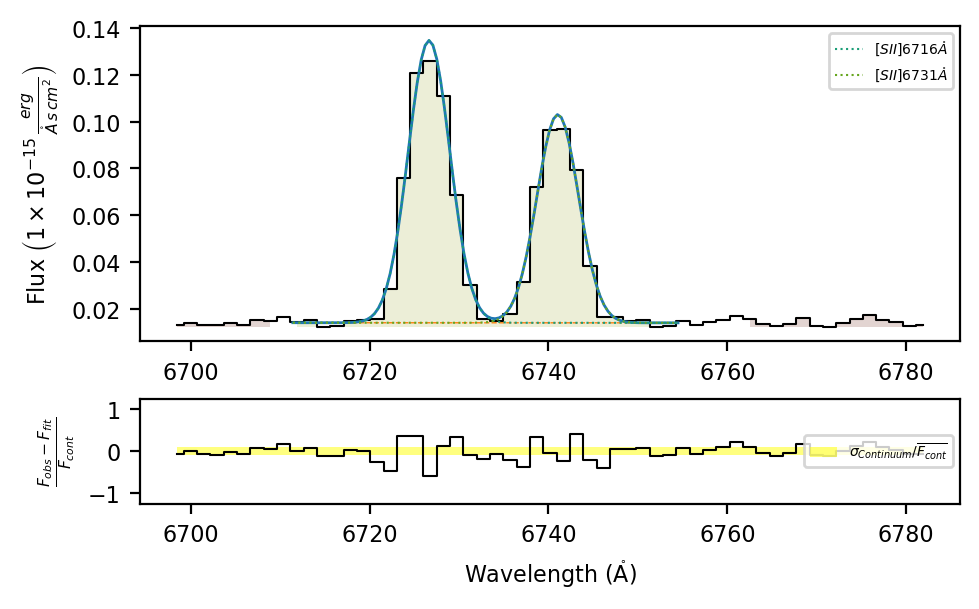

In [73]:
# New attempt including the fit configuration
spec16.fit.bands(line16_S2,band_edges16_S2, fit_conf=fit_conf16_S2)
spec16.plot.bands()

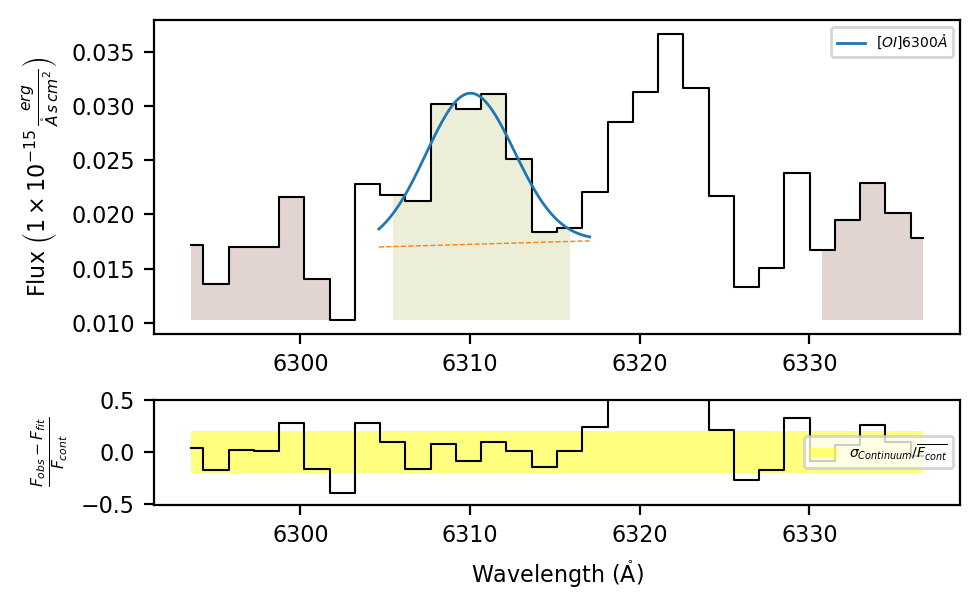

In [74]:
spec16.fit.bands(6300)
spec16.plot.bands()

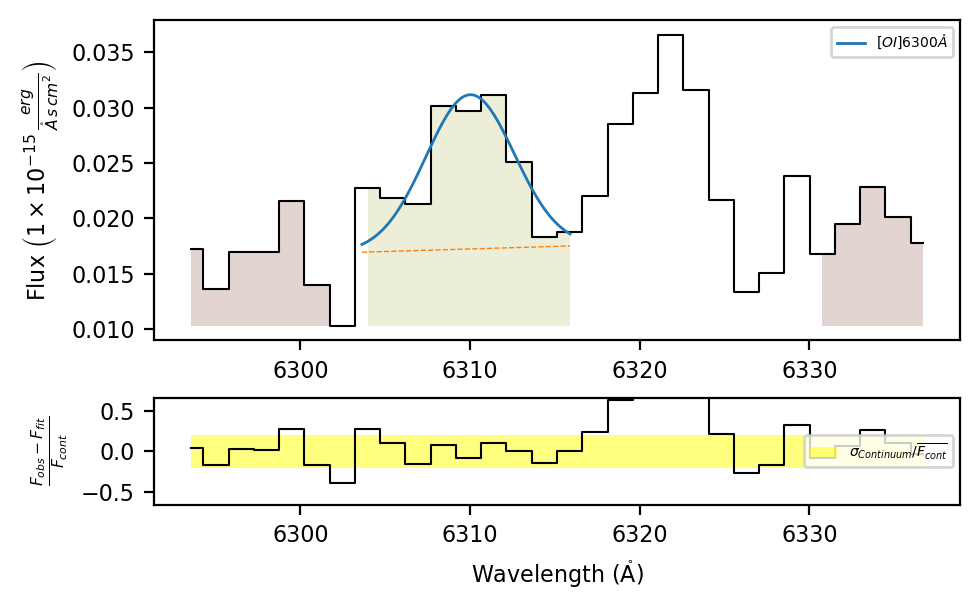

In [76]:
line16_OI = 'O1_6300A'
#band_edges_OI_8 = np.array([6282.963147, 6293.637954, 6294.754436, 6307.155360, 6319.711710, 6327.945925])
band_edges_OI_16 = np.array([6282.963147, 6293.637954, 6293.754436, 6306, 6319.711710, 6327.945925])
spec16.fit.bands(line16_OI, band_edges_OI_16)
spec16.plot.bands()

SLIT 27

In [77]:
hdul27 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_1D_f99_c00.fits', mode='update')
header27 = hdul27[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header27['FLUXSCAL'] = 1
header27

hdul27.flush()

In [78]:
print(header27)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2699 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-11-04T18:29:34' / Date FITS file was generated                  IRAF-TLM= '2024-11-04T18:29:34' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4032.66870117188 / RA at R

In [79]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file27 = "../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_1D_f99_c00.fits"

#load the data
wave27, flux27, hdr27 = import_1313_fits(fits_file27)

In [80]:
spec27 = lime.Spectrum(wave27, flux27, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

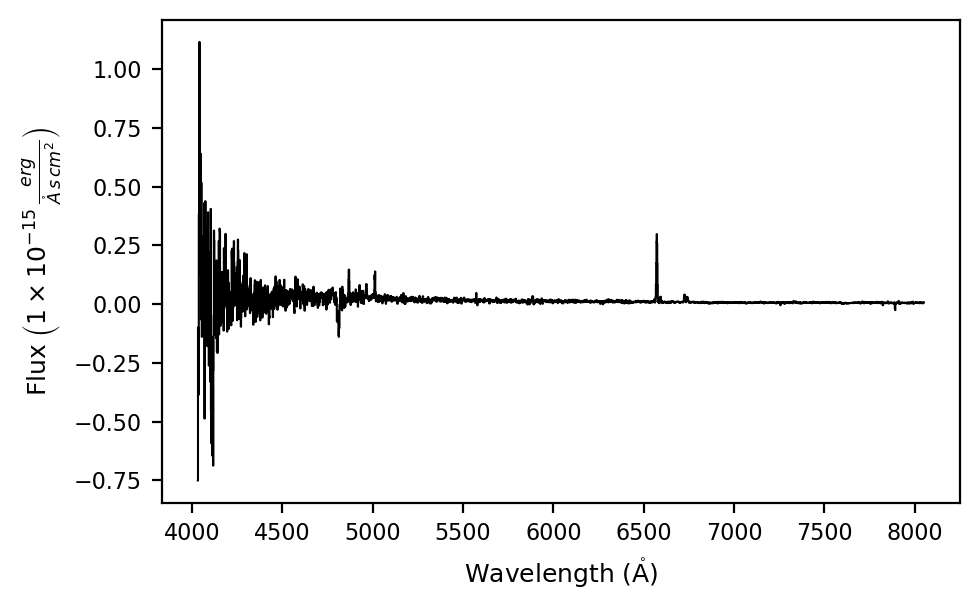

In [81]:
spec27.plot.spectrum(label='slit27_mask2_NGC1313')

In [82]:
# Line name, its location mask in the rest _frame and fit configuration
line27_Ha = 'H1_6563A_b'
band_edges27_Ha = np.array([6438.03, 6508.66, 6535.10, 6594, 6627.70, 6661.82])
fit_conf27_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

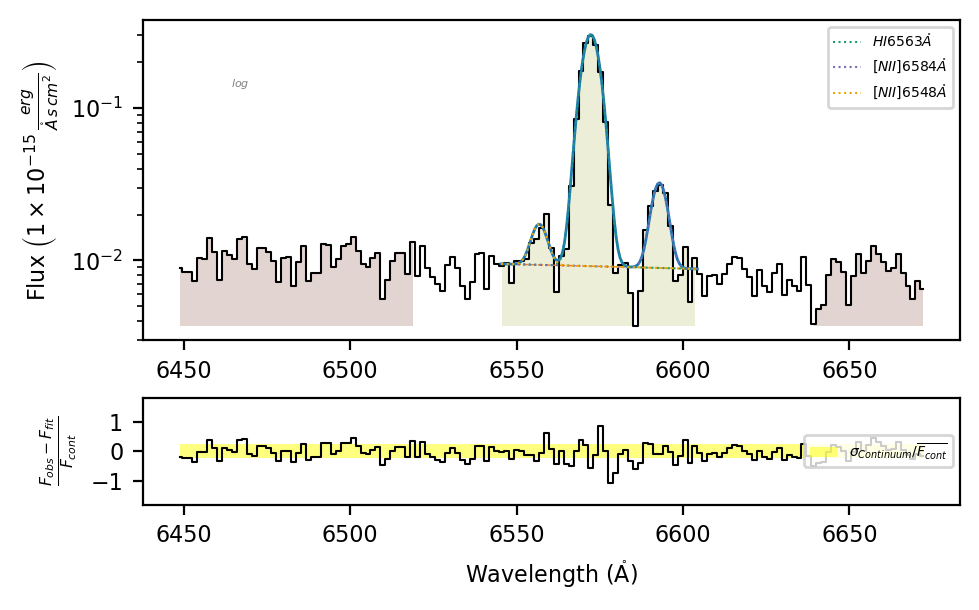

In [83]:
# New attempt including the fit configuration
spec27.fit.bands(line27_Ha, band_edges27_Ha, fit_conf=fit_conf27_Ha)
spec27.plot.bands()

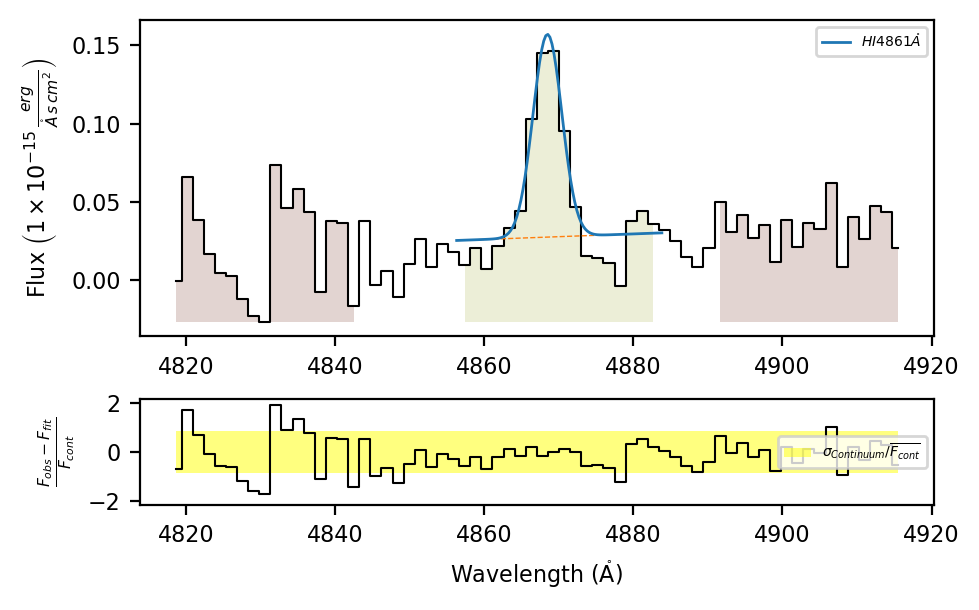

In [84]:
spec27.fit.bands(4861)
spec27.plot.bands()

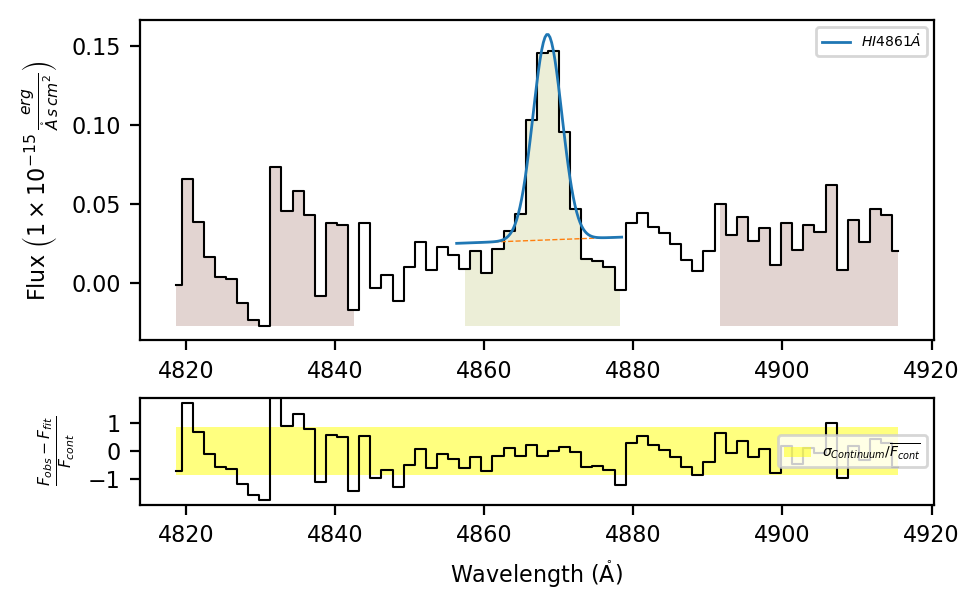

In [86]:
# Line name and its location mask in the rest _frame
line27_Hb = 'H1_4861A'
#band_edges = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4883.13, 4908.40])
band_edges27_Hb = np.array([4809.80, 4836.10, 4848.715437, 4870.8, 4883.13, 4908.40])

# Run the fitting and plot it
spec27.fit.bands(line27_Hb, band_edges27_Hb)
spec27.plot.bands()

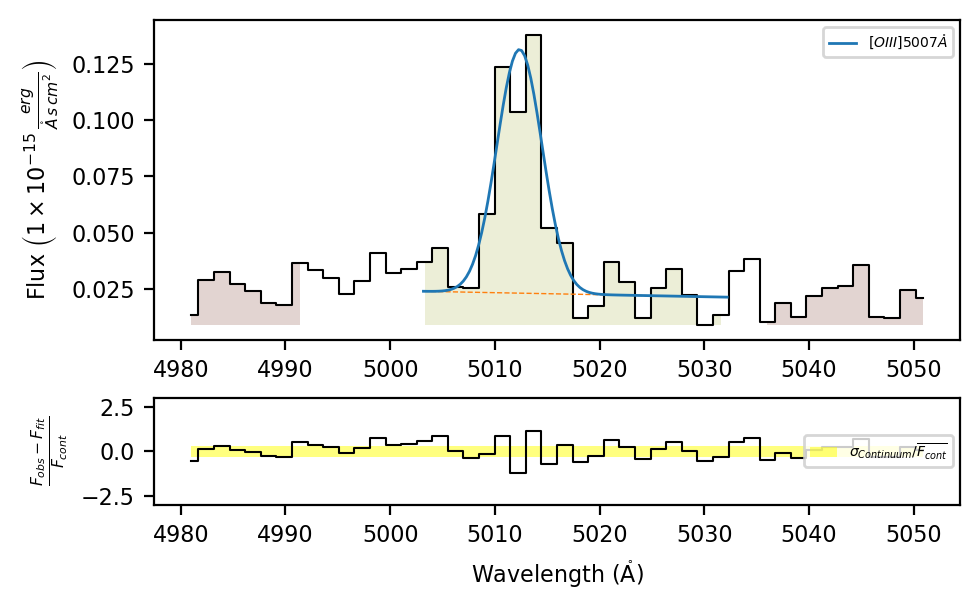

In [87]:
spec27.fit.bands('O3_5007A')
spec27.plot.bands()

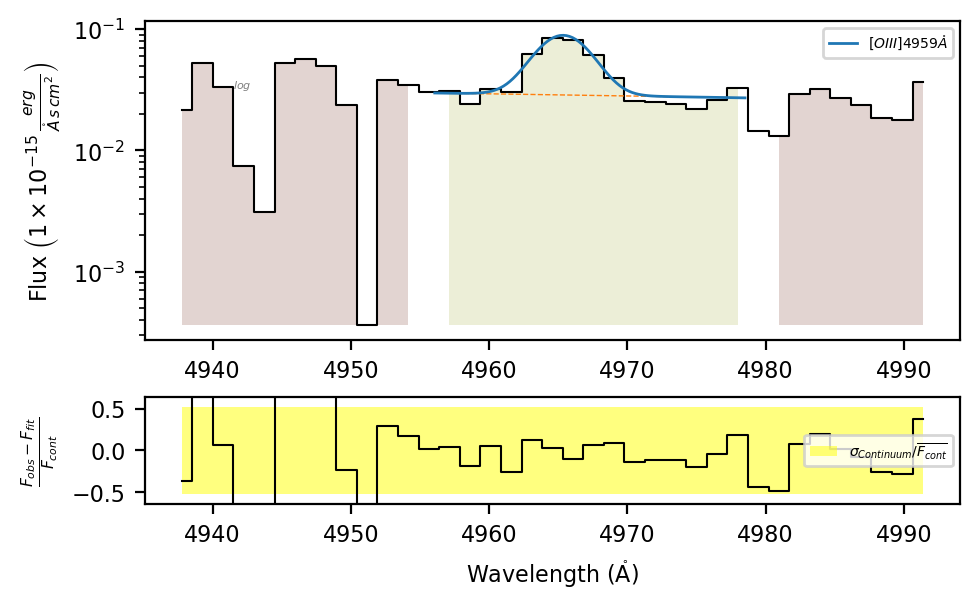

In [88]:
spec27.fit.bands(4959)
spec27.plot.bands()

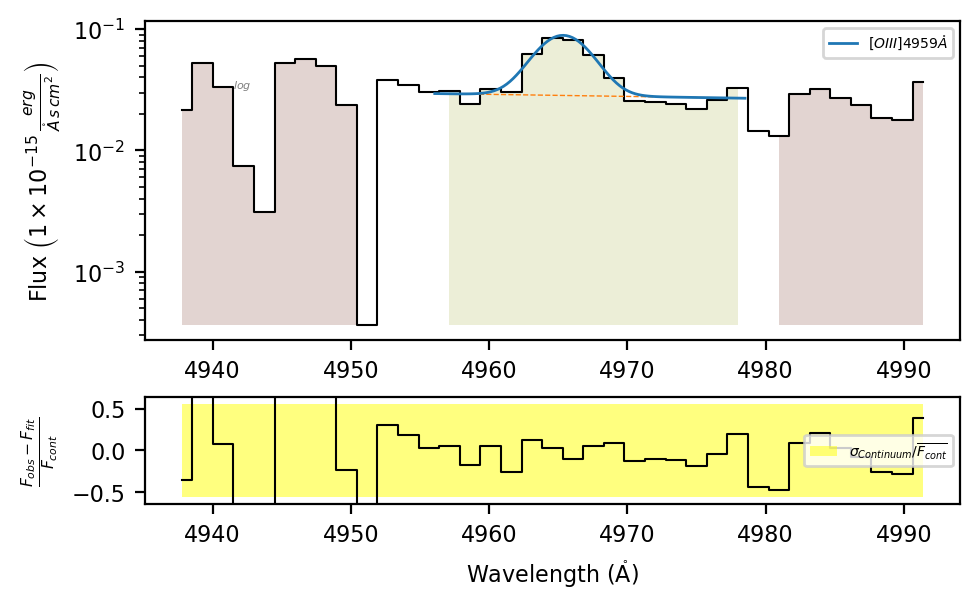

In [95]:
# Line name, its location mask in the rest _frame and fit configuration
line27_O3 = 'O3_4959A'
band_edges27_O3 = np.array([4929.281844, 4944.5, 4948.310671, 4970.712011, 4972.820372, 4984.416360])
spec27.fit.bands(line27_O3, band_edges27_O3)
spec27.plot.bands()


In [96]:
# Line name, its location mask in the rest _frame and fit configuration
line27_S2 = 'S2_6716A_b'
band_edges27_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf27_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

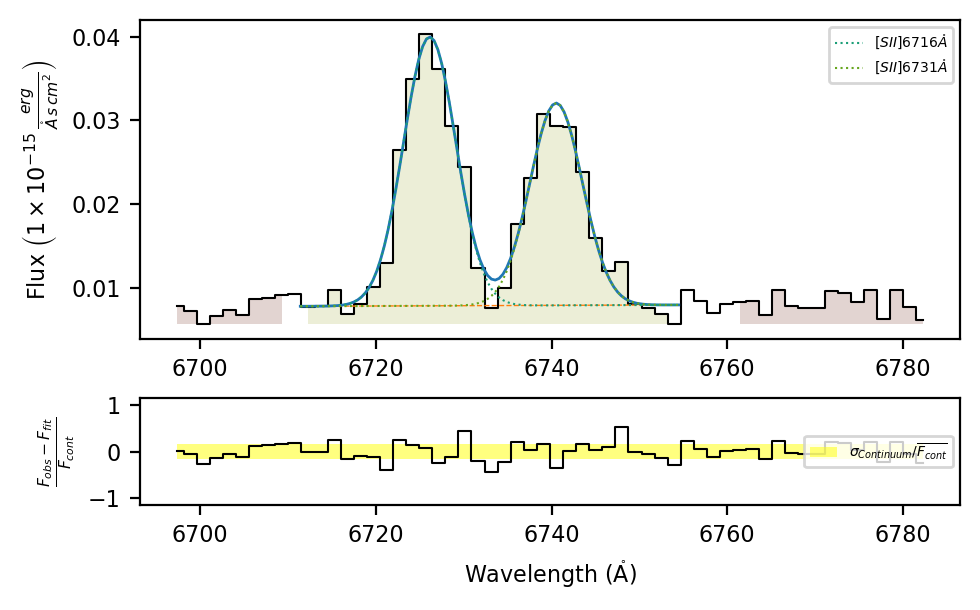

In [97]:
# New attempt including the fit configuration
spec27.fit.bands(line27_S2,band_edges27_S2, fit_conf=fit_conf27_S2)
spec27.plot.bands()

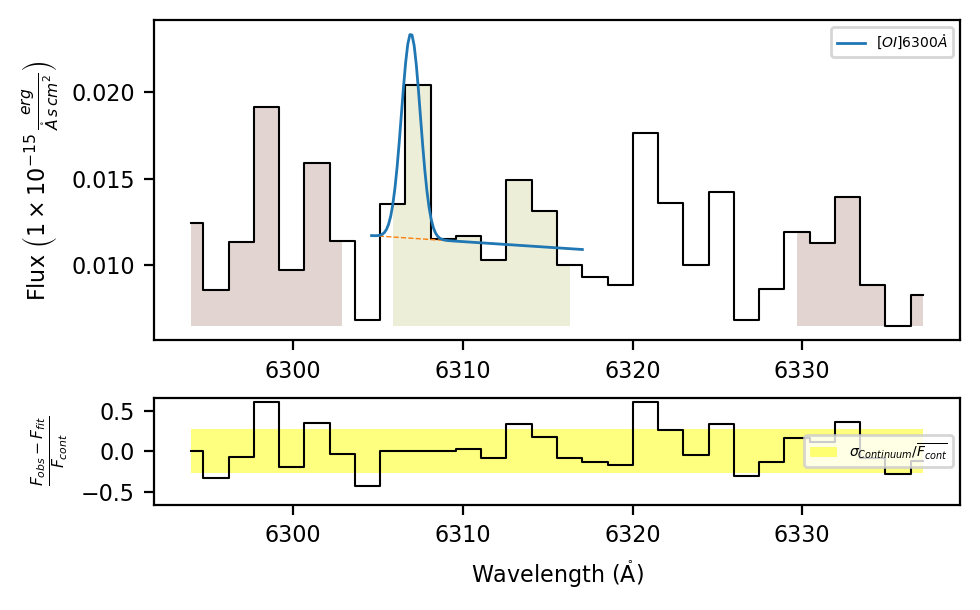

In [98]:
spec27.fit.bands(6300)
spec27.plot.bands()

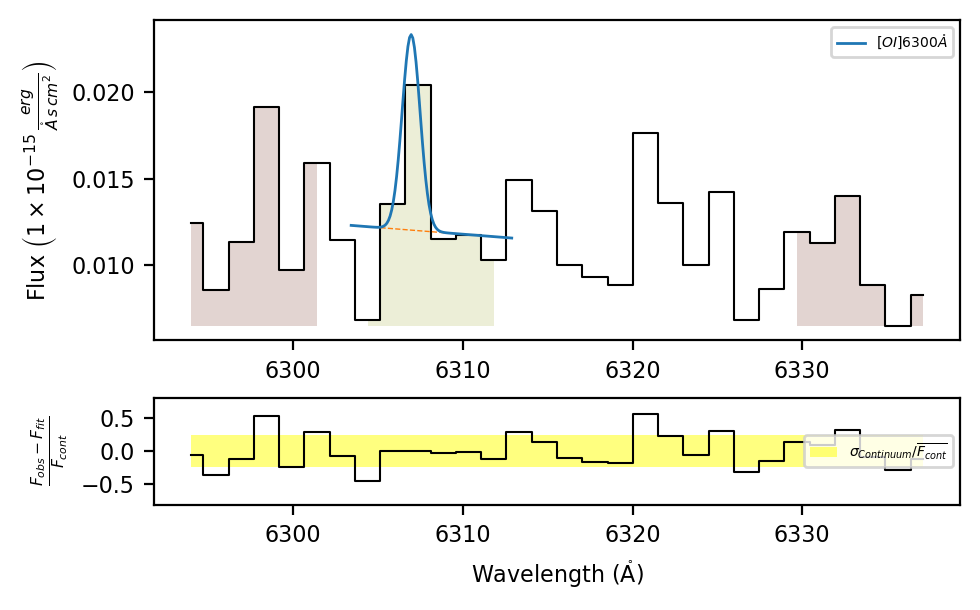

In [100]:
line27_OI = 'O1_6300A'
#band_edges_OI_14 = np.array([6282.963147, 6293.637954, 6294.754436, 6307.155360, 6319.711710, 6327.945925])
band_edges_OI_27 = np.array([6282.963147, 6293, 6293.554436, 6303, 6319.711710, 6327.945925])

spec27.fit.bands(line27_OI, band_edges_OI_27)
spec27.plot.bands()

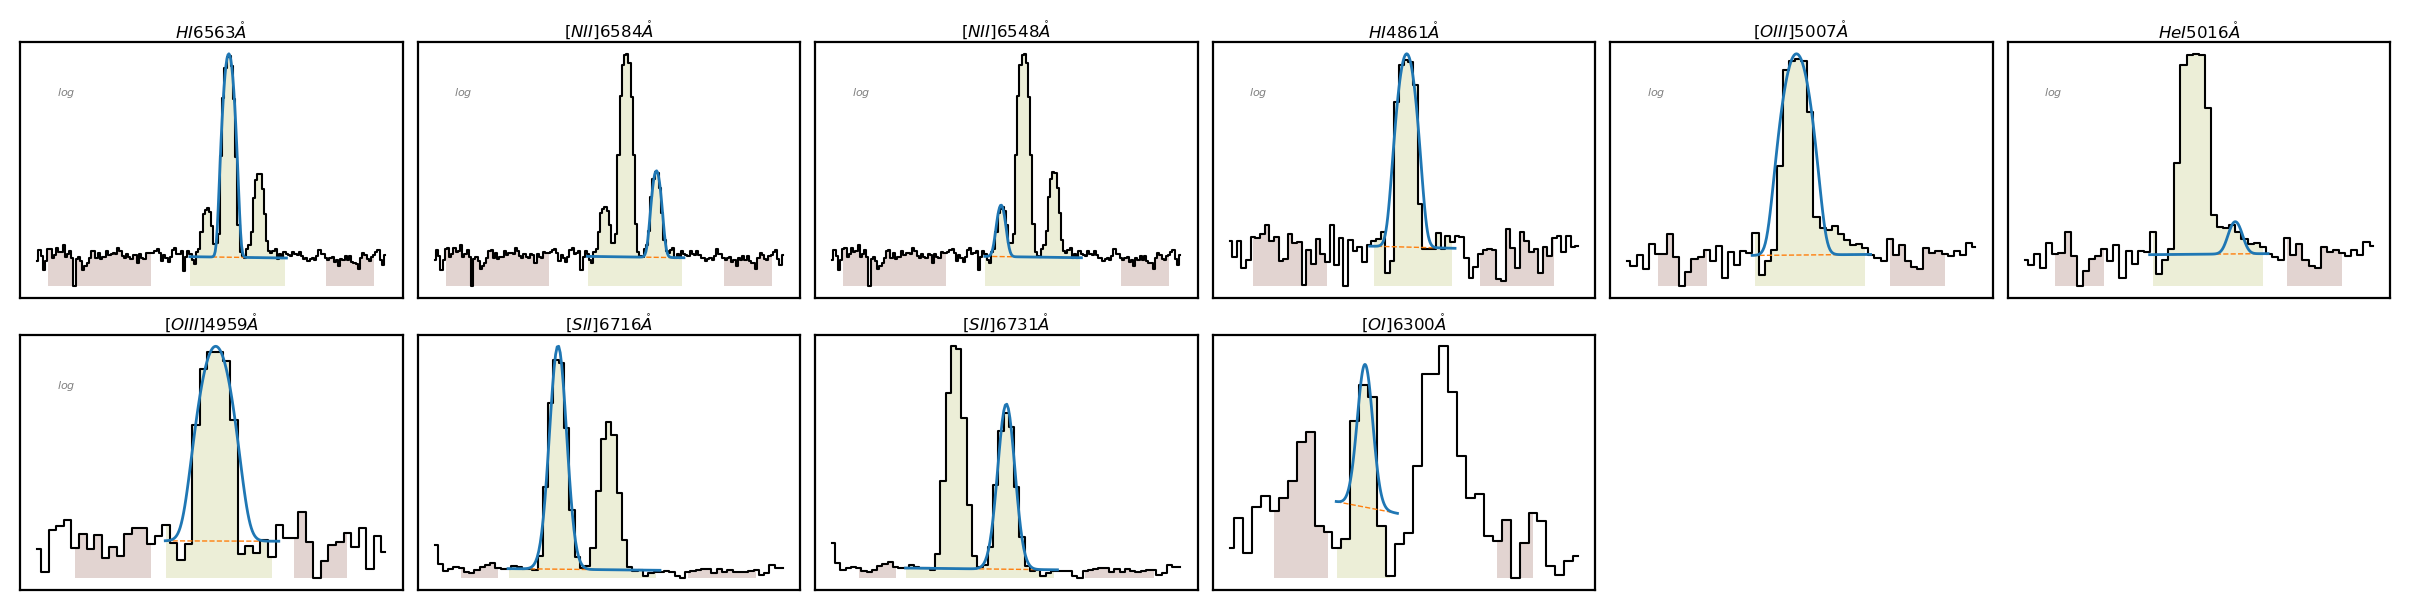

In [102]:
spec8.plot.grid()

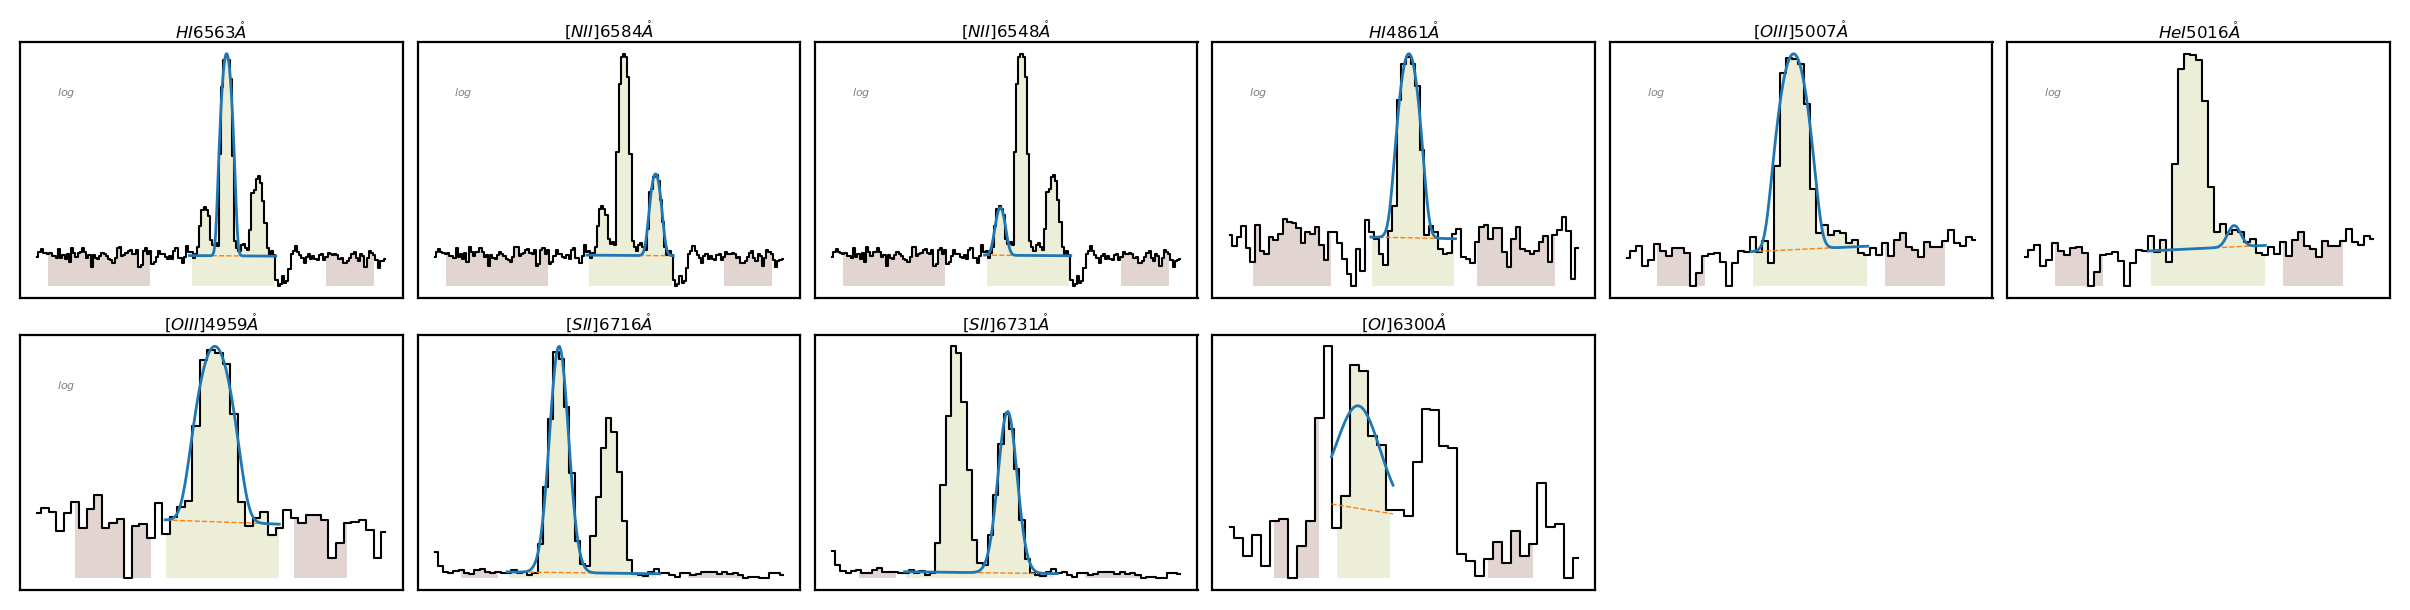

In [103]:
spec14.plot.grid()

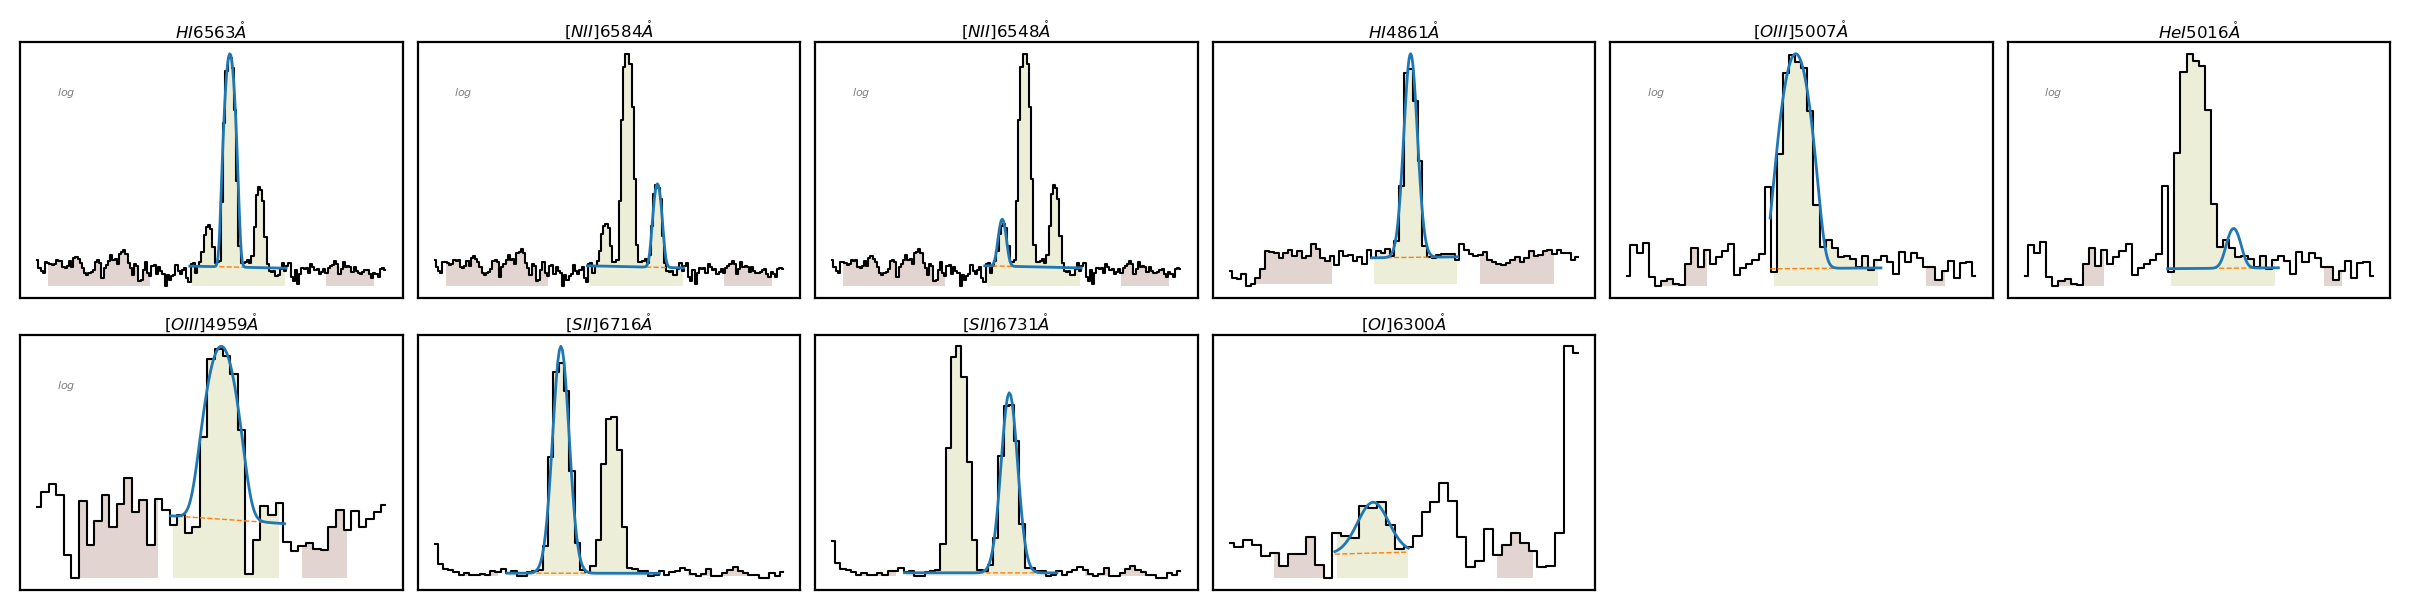

In [104]:
spec16.plot.grid()

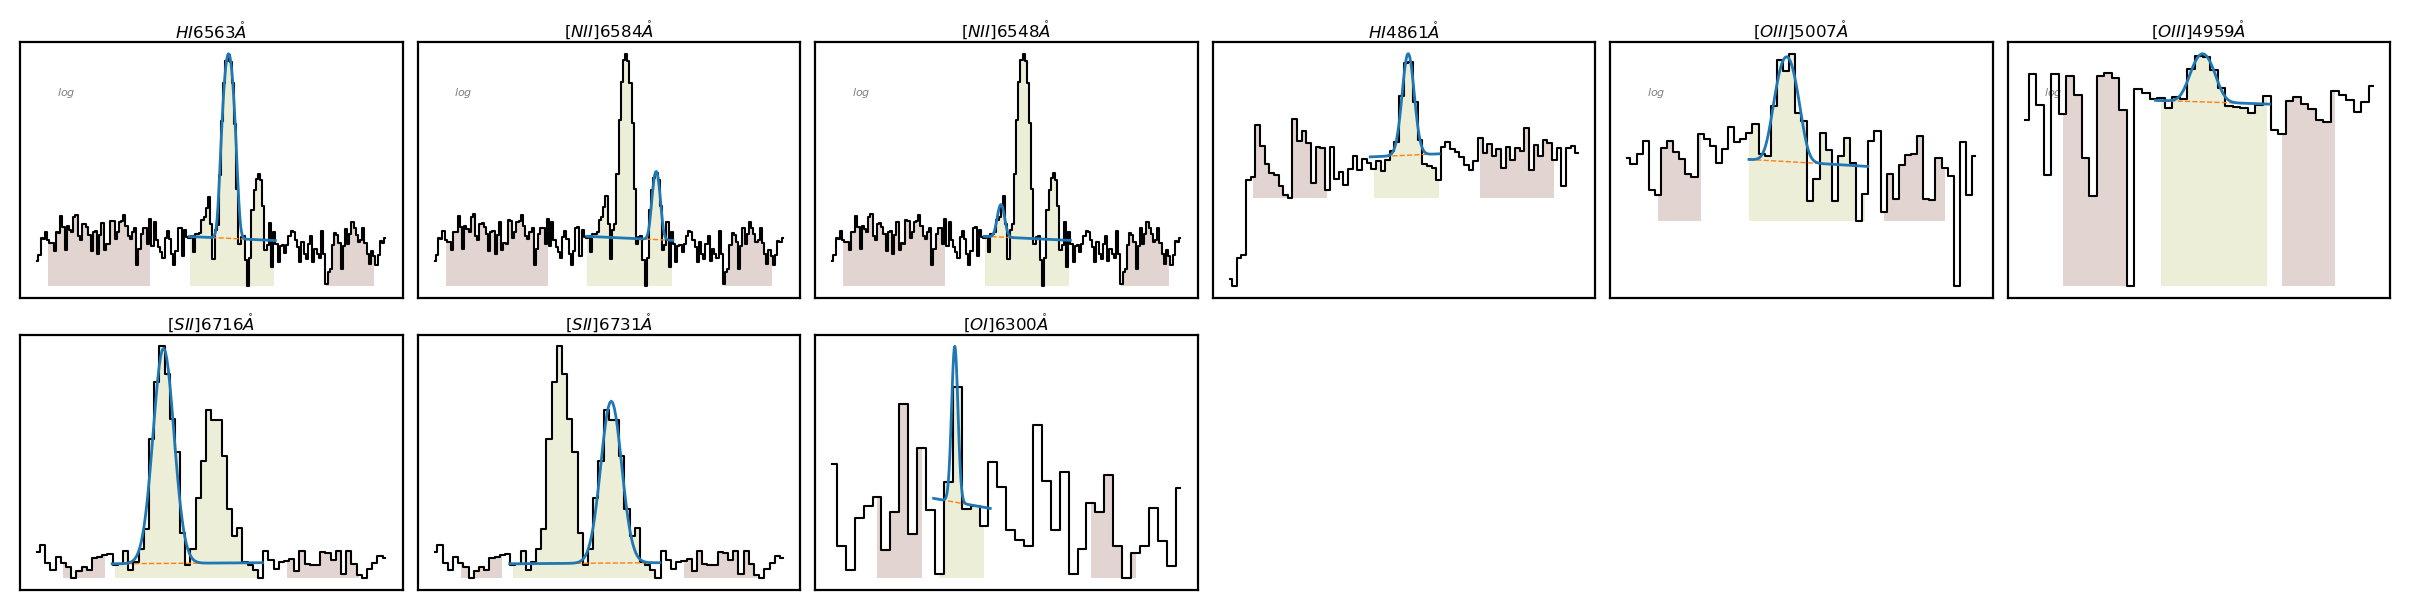

In [105]:
spec27.plot.grid()

In [107]:
spec8.fit.frame
spec14.fit.frame
spec16.fit.frame
spec27.fit.frame


<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x12dcad160>>

In [108]:
spec8.save_frame('slit8_measurement_emission_lines.txt')
spec14.save_frame('slit14_measurement_emission_lines.txt')
spec16.save_frame('slit16_measurement_emission_lines.txt')
spec27.save_frame('slit27_measurement_emission_lines.txt')
